In [12]:
# Essential Libraries
import random
import time
import json
import signal
import copy
import glob

# Scientific Libraries
import numpy as np
from scipy.stats import norm

# RDKit Libraries
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Graph Libraries
import networkx as nx
import networkx.algorithms.isomorphism as iso

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning Libraries
from sklearn.metrics import confusion_matrix

# Configure Matplotlib to use LaTeX and Times New Roman for fonts
plt.rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"]

from utils import macro_unsupervised as unsup
from utils import plot

# Load Graphs for GED Dataset

In [3]:
GED_GRAPHS_400 = {}
GED_GRAPHS_400_path = "../GED_GRAPHS_400/"
for name in glob.glob(GED_GRAPHS_400_path + "*.gpickle"):
    graph = nx.read_gpickle(name)
    GED_GRAPHS_400[name[len(GED_GRAPHS_400_path) : -8]] = graph

# Load GED Dataset

In [4]:
with open("../GED_Dict_400_400.json", "r") as json_file:
    GED_Dict_400_400 = json.load(json_file)
print(len(GED_Dict_400_400))

160000


In [8]:
random.seed(42)
with open("../graph_0_199_IDs.json", "r") as json_file:
    graph_0_199_IDs = json.load(json_file)

with open("../graph_200_399_IDs.json", "r") as json_file:
    graph_200_399_IDs = json.load(json_file)

graph_0_399_IDs = graph_0_199_IDs + graph_200_399_IDs

{0: 'Glc', 1: 'Rha', 2: 'Xyl'}


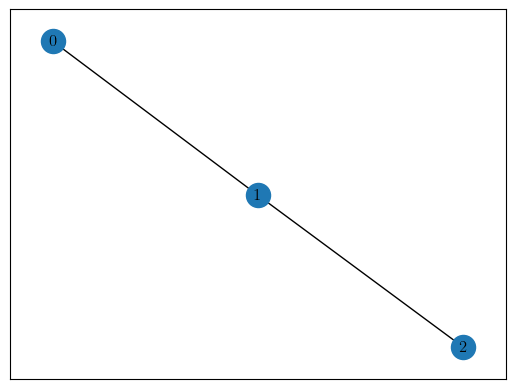

In [20]:
plot.graph(GED_GRAPHS_400[graph_0_399_IDs[0]])

{0: 'Kdo', 1: 'Kdo', 2: 'Gal', 3: 'GlcN', 4: 'GlcN'}


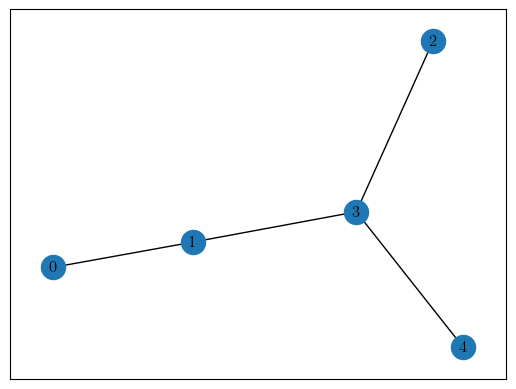

In [21]:
plot.graph(GED_GRAPHS_400[graph_0_399_IDs[104]])

# Graph Edit Distance with A* method implemented by networkx

In [43]:
unsup.edit_distance(GED_GRAPHS_400[graph_0_399_IDs[0]],GED_GRAPHS_400[graph_0_399_IDs[104]])

5.81993006993007

In [44]:
graph_pair_key = graph_0_399_IDs[0] + "," + graph_0_399_IDs[104]
GED_Dict_400_400[graph_pair_key]

5.822556390977444

In [37]:
# uncomment to calculate the whole graph edit distance for GED_matrix_400_400
#GED_matrix_400_400 = np.zeros([400,400])

#for i in range(0, 400):
#    for j in range(0, 400):
#        GED_matrix_400_400[i,j] = unsup.edit_distance(GED_GRAPHS_400[graph_0_399_IDs[i]],
#                                                      GED_GRAPHS_400[graph_0_399_IDs[j]])

In [33]:
GED_matrix_400_400 = np.zeros([400,400])

for i in range(0, 400):
    for j in range(0, 400):
        graph_pair_key = graph_0_399_IDs[i] + "," + graph_0_399_IDs[j]
        GED_matrix_400_400[i,j] = GED_Dict_400_400[graph_pair_key]

# Graph Kernel Method

In [34]:
sim_matrix_from_graph_kernel = unsup.similarity_matrix(dict_graphs = GED_GRAPHS_400, 
                                                   method='kernel', 
                                                    M_input="L2", 
                                                    w_input=11.0,)